NLTK is just a natural language processing tookkit and not a machine learning module. But, SCIKIT LEARN is.
Although NLTK has naive bayes and all but Scikit learn has those too along with other machine learning algorithms.

In [4]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier #It can wrap sklearn algorithms inside nltk classifiers
nltk.download('movie_reviews')
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

#documents = [(list(movie_reviews.words(fileid)), category)
#                  for category in movie_reviews.categories()
#                  for fileid in movie_reviews.fileids(category)]



[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Training and testing set

In [5]:
documents = []
for category in movie_reviews.categories():
 for fileid in movie_reviews.fileids(category):
    documents.append((list(movie_reviews.words(fileid)), category))

random.shuffle(documents)

print(documents[1])

(['salaries', 'of', 'hollywood', 'top', 'actors', 'are', 'getting', 'obscenely', 'large', 'these', 'days', 'and', 'many', 'find', 'this', 'to', 'be', 'the', 'main', 'reason', 'for', 'skyrocketing', 'movie', 'budgets', '.', 'actors', 'who', 'demand', 'such', 'salaries', 'might', 'be', 'greedy', ',', 'but', 'in', 'some', 'instances', 'they', 'are', 'quite', 'justified', ',', 'because', 'many', 'films', 'would', 'never', 'be', 'watched', 'or', 'even', 'made', 'without', 'their', 'participation', '.', 'proof', 'for', 'that', 'can', 'be', 'found', 'even', 'in', 'the', 'realm', 'of', 'low', '-', 'budget', 'movies', ',', 'and', 'one', 'fine', 'example', 'is', 'breakaway', ',', '1995', 'thriller', 'directed', 'by', 'sean', 'dash', 'and', 'starring', '(', 'in', ')', 'famous', 'figure', 'skater', 'tonya', 'harding', '.', 'face', 'of', 'tonya', 'harding', 'is', 'most', 'prominently', 'featured', 'on', 'movie', "'", 's', 'poster', ',', 'but', 'the', 'main', 'star', 'of', 'the', 'film', 'is', 'terr

We are going to use this bag of words and compile them. After taking this list of words, Then take most popular words we used and then will classify which are positive words and which ae negative texts based on the words that they contain.

In [6]:
all_words = []
for w in movie_reviews.words():
  all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15)) #Most common 15 words from the bag of words
print(all_words["stupid"]) #Frequency of the word Stupid

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
253


In [7]:
word_features = list(all_words.keys())[:3000] #Most feequent 3000 words
print(word_features)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'what', "'", 's', 'deal', '?', 'watch', 'movie', '"', 'sorta', 'find', 'out', 'critique', 'mind', '-', 'fuck', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', '(', 'lost', 'highway', '&', 'memento', ')', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'didn', 't', 'snag', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'to

In [8]:
def find_features(document):
  words = set(document)
  features = {}
  for w in word_features:
    features[w] = (w in words) #if the document contains any of the top 3000 words from the word_features list, It will return True. Else, False

  return features

print(find_features(movie_reviews.words('neg/cv000_29416.txt'))) #giving the document to run operation

featuresets = [(find_features(rev),category) for (rev, category) in documents] #Checking if those document words are in those top 3000 popular words or not

{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

In [9]:
#In training sets, We have to see how many of them (words of the list "word_features") appeared in the negative reviews and how many of
# them appeared in the positive reviews
training_set = featuresets[:1900] #Training set 

#In testing sets, We don't tell the machine the category, The machine will have to tell us of which category the words belongs to
testing_set = featuresets[1900:]  #Testing set

Application of the Naive Bayes Algorithm

**Naive Bayes:** Its just Bayes algorithm works on very strong independent assumptions for each feature. 

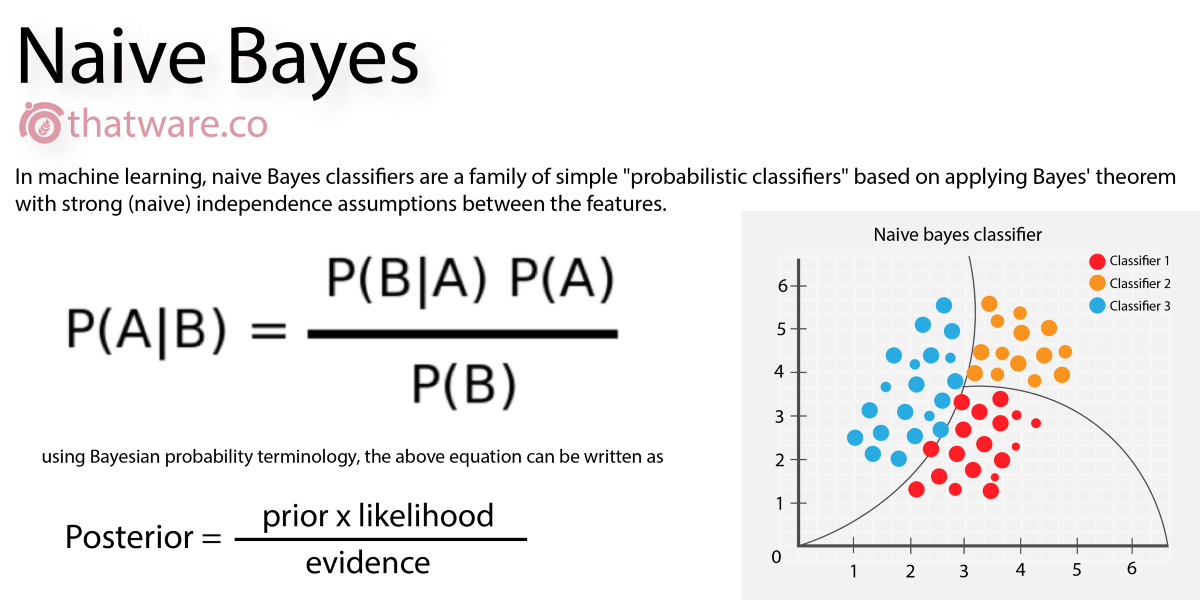

#Original naive bayes accuracy

In [10]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Naive bayes algo aaccuracy: ",nltk.classify.accuracy(classifier, testing_set))
classifier.show_most_informative_features(15)

Naive bayes algo aaccuracy:  0.78
Most Informative Features
                   sucks = True              neg : pos    =     10.4 : 1.0
                  annual = True              pos : neg    =      8.8 : 1.0
                 frances = True              pos : neg    =      8.8 : 1.0
                  sexist = True              neg : pos    =      7.8 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
             silverstone = True              neg : pos    =      7.1 : 1.0
                 idiotic = True              neg : pos    =      7.1 : 1.0
              schumacher = True              neg : pos    =      7.1 : 1.0
           unimaginative = True              neg : pos    =      7.1 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
                  turkey = True              neg : pos    =      6.4 : 1.0
               atrocious = True              neg : pos    =      6.3 : 1.0
                 singers = True         

#Sklearn incorporation and Training the algorithm

Multinomial Naive bayes

In [11]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB classifier aaccuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))

MNB classifier aaccuracy:  0.8


Gaussian Naive bayes

In [12]:
GNB_classifier = SklearnClassifier(GaussianNB())
GNB_classifier.train(training_set)
print("GNB classifier aaccuracy: ",nltk.classify.accuracy(GNB_classifier, testing_set))

TypeError: ignored

Bernoulli Naive bayes

In [13]:
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BNB classifier aaccuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))

BNB classifier aaccuracy:  0.79


Logistic regression classifier

In [14]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression classifier aaccuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression classifier aaccuracy:  0.8


SGD classifier

In [15]:
SGDClassifier = SklearnClassifier(SGDClassifier())
SGDClassifier.train(training_set)
print("SGDClassifier aaccuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))

SGDClassifier aaccuracy:  0.78


SVC classifier

In [16]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC classifier aaccuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))

SVC classifier aaccuracy:  0.88


LinearSVC classifier

In [17]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC classifier aaccuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))

LinearSVC classifier aaccuracy:  0.8


NuSVC classifier

In [18]:
NuSVC_classifier = SklearnClassifier(NuSVC(nu=0.5))
NuSVC_classifier.train(training_set)
print("NuSVC classifier aaccuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

NuSVC classifier aaccuracy:  0.87


All in one glance

In [20]:
print("MNB classifier aaccuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))
print("BNB classifier aaccuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))
print("LogisticRegression classifier aaccuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))
print("SGDClassifier aaccuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))
print("SVC classifier aaccuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))
print("LinearSVC classifier aaccuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))
print("NuSVC classifier aaccuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

MNB classifier aaccuracy:  0.8
BNB classifier aaccuracy:  0.79
LogisticRegression classifier aaccuracy:  0.8
SGDClassifier aaccuracy:  0.78
SVC classifier aaccuracy:  0.88
LinearSVC classifier aaccuracy:  0.8
NuSVC classifier aaccuracy:  0.87
